In [1]:
import numpy as np
import pandas as pd
import exploratory_data_analysis.eda_functions as eda

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## Function tht display the splits of the tree,
from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics


In [2]:
location = '~/Scripts/DS/MachineLearning/data/churnModeling.csv'

In [3]:
df = pd.read_csv(location)

In [4]:
## looking at the first 5 examples
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,0,1


In [5]:
eda.get_invalid_values(df)

,nulls,invalids,unique_item
CreditScore,0,0,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ..."
Age,0,0,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2..."
Tenure,0,0,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]"
Balance,0,0,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78..."
NumOfProducts,0,0,"[1, 3, 2, 4]"
HasCrCard,0,0,"[1, 0]"
IsActiveMember,0,0,"[1, 0]"
EstimatedSalary,0,0,"[101348.88, 112542.58, 113931.57, 93826.63, 79..."
Exited,0,0,"[1, 0]"
Loyalty,0,0,"[0.0476190476190476, 0.024390243902439, 0.1904..."


In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
## AVG balance of customers who churned

df[df['Exited'] == 1]['Balance'].mean()

91108.53933726063

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Loyalty            10000 non-null  float64
 10  Geography_Germany  10000 non-null  int64  
 11  Geography_Spain    10000 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 937.6 KB


In [9]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Loyalty',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [10]:
x_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Loyalty',
       'Geography_Germany', 'Geography_Spain']

In [11]:
## Split data
y = df['Exited']
X = df[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [12]:
## Intatiate the model 
dtree = DecisionTreeClassifier(random_state=42)

## Fit the model to training data
dtree.fit(X_train, y_train)

## Making predictions
pred = dtree.predict(X_test)

In [13]:
## Metrics

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1991
           1       0.49      0.49      0.49       509

    accuracy                           0.79      2500
   macro avg       0.68      0.68      0.68      2500
weighted avg       0.79      0.79      0.79      2500



In [14]:
## Metrics different way

def get_scores2(y_test, predictions):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = metrics.f1_score(y_test, pred)

    scores = [
        accuracy, 
        precision, 
        recall, 
        f1,
    ]

    columns = [
        'accuracy', 
        'precision', 
        'recall', 
        'f1',
    ]

    scor = pd.DataFrame([scores], columns=columns)
    scor.columns = columns
    return scor

get_scores2(y_test, pred)

,accuracy,precision,recall,f1
0,0.7936,0.493042,0.48723,0.490119


In [15]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

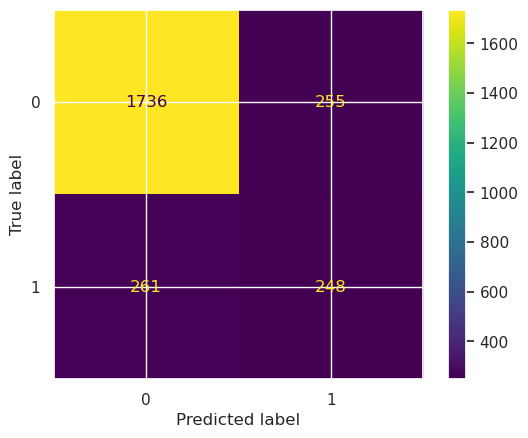

In [16]:
conf_matrix_plot(dtree, X_test , y_test)

### notes

It appears slightly more likely to predict a false positive than a false negative but it's generally balanced. This is reflected in the precision and recall scores both being very close to each other.

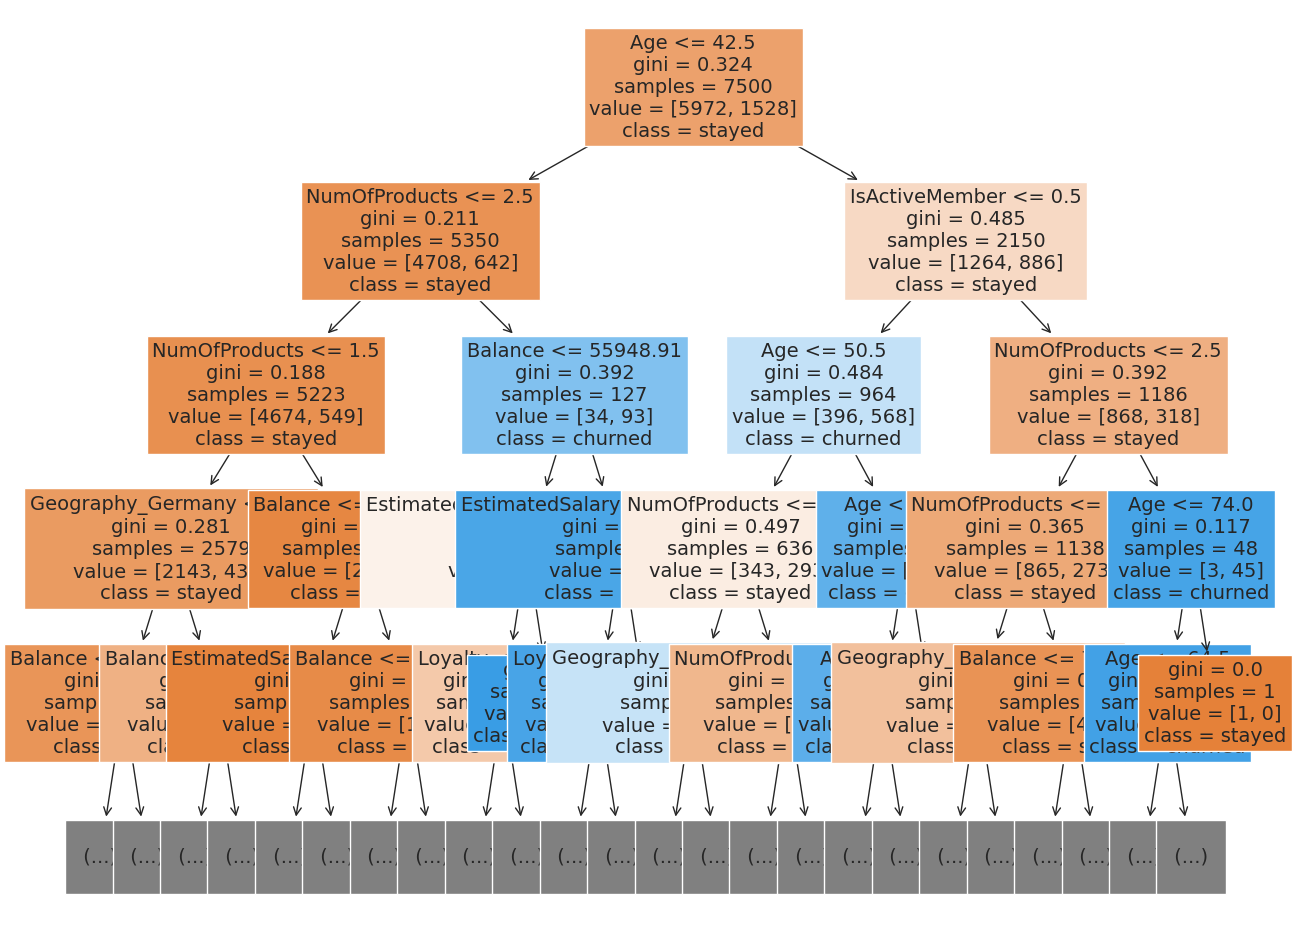

In [17]:
# Plot the tree
plt.figure(figsize=(15,12))
plot_tree(dtree, max_depth=4, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'churned'}, filled=True);
plt.show()

## GridSearch

`from sklearn.model_selection import GridSearchCV`

## Cross-validated hyperparameter tuning

1. Create a dict of hypeparameters (keys) to search over a list ov valid values. 
2. Create a dict to capture the preselected metrics. [built-in options](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
3. Instatiate the classifier and set the random_state
4. * Instantiate the `GridSearchCV` object. Pass as arguments:
      - The **classifier** in this case decision tree
      - The **dictionary** of hyperparameters to search over
      - The **dictionary** of scoring metrics 
      - The number of **cross-validation folds** you want (`cv=5`)
      - The **scoring metric** that you want GridSearch to use when it selects the **"best" model** (i.e., the model that performs best on average over all validation folds) (`refit='f1'`*)

    \* The reason it's called `refit` is because once the algorithm finds the combination of hyperparameters that results in the best average score across all validation folds, it will then refit this model to _all_ of the training data. Remember, up until now, with a 5-fold cross-validation, the model has only ever been fit on 80% (4/5) of the training data, because the remaining 20% was held out as a validation fold.

5. Fit the data (`X_train`, `y_train`) to the `GridSearchCV` object (`clf`)

---
  
#### Resources

[gridsearch](https://scikit-learn.org/stable/modules/grid_search.html)

[GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [18]:
#1# Decision tree parameters
decision_tree_parameters = {
            'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
            'min_samples_leaf': [2, 5, 10, 20, 50],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5],
            "max_features": ["auto", "sqrt", "log2"],

            
}


#2# Dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}


#3# Instantiate the classifier
tuned_decision_tree = DecisionTreeClassifier(random_state=42)


#4# Instantiate the GridSearchCV object and Pass as arguments
clf = GridSearchCV(
                   tuned_decision_tree, 
                   decision_tree_parameters, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

#5# Fit the model
clf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             refit='f1', scoring={'precision', 'f1', 'accuracy', 'recall'})

In [19]:
best_parameters = clf.best_params_

The `best_score_` attribute returns the best average F1 score across the different folds among all the combinations of hyperparameters. Note that if we had set `refit='recall'` when we instantiated our `GridSearchCV` object earlier, then calling `best_score_` would return the best recall score, and the best parameters might not be the same as what they are in the above cell, because the model would be selected based on a different metric.

In [20]:
best_parameters

{'max_depth': 11,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [21]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.5118


In [22]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy
                        },
                        ignore_index=True
                       )
  
    return table

In [23]:
# Call the function on our model
result_table = make_results('tunedDecisionTree', clf)

/tmp/ipykernel_33041/2409802599.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


In [24]:
# Save results table as csv
result_table.to_csv("Results.csv")

In [25]:
result_table

,Model,F1,Recall,Precision,Accuracy
0,tunedDecisionTree,0.511772,0.443737,0.608755,0.8284
